In [14]:
import reservoirpy as rpy

# 1. Set some global parameters
rpy.verbosity(0)  # no need to be too verbose here
rpy.set_seed(42)  # make everything reproducible!

In [15]:
# 2. Create the reservoir and readout
from reservoirpy.nodes import Reservoir, Ridge

reservoir = Reservoir(100, lr=0.5, sr=0.9)
readout = Ridge(ridge=1e-7)

esn_model = reservoir >> readout

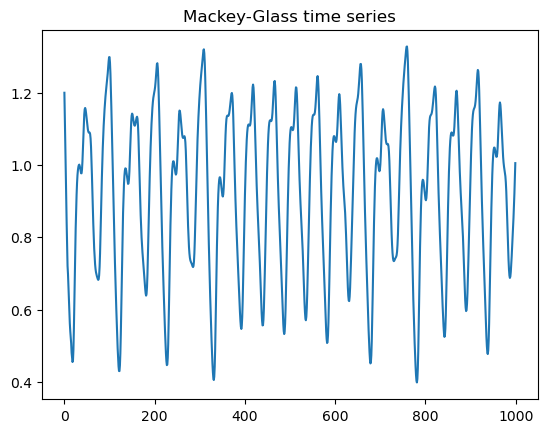

In [16]:
# 3. Generate the data (Mackey–Glass equations)
from reservoirpy.datasets import mackey_glass

# 𝑎 = 0.2, 𝑏 = 0.1, 𝑐 = 10 (same as Jaeger’s paper[1]) and 𝜏 = 17 are set.
X = mackey_glass(n_timesteps=1500, tau=17, a=0.2, b=0.1, n=10, x0=1.2)
X_train, Y_train = X[:1000], X[1:1001]

import matplotlib.pyplot as plt
plt.plot(X_train)
plt.title('Mackey-Glass time series')
plt.show()

In [17]:
# 4. Train the model
esn_model = esn_model.fit(X_train, Y_train, warmup=10)
print(reservoir.is_initialized, readout.is_initialized, readout.fitted)

True True True


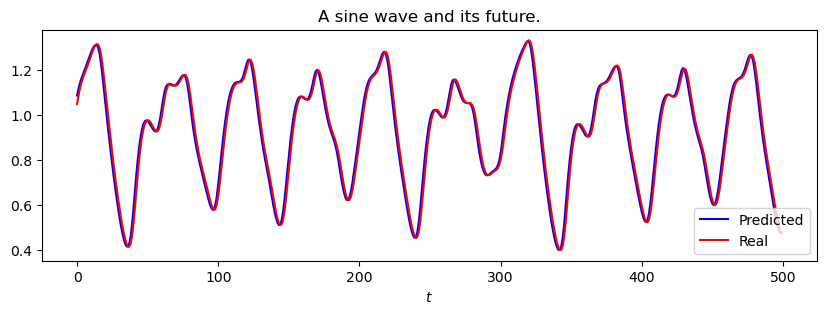

In [18]:
# 5. Predict the future
Y_pred = esn_model.run(X[1000:])

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(Y_pred, label="Predicted", color="blue")
plt.plot(X[1000:], label="Real", color="red")
plt.legend()
plt.show()